In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [2]:
# Define the function
def f(v):
    x, y = v
    return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(4*y**2-4)*y**2

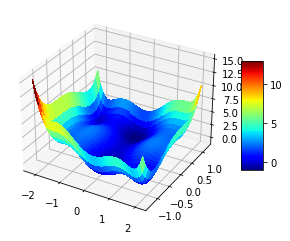

In [3]:
from matplotlib import cm
#Plot
x = np.arange(-2.2, 2.2, 0.1)
y = np.arange(-1.3, 1.3, 0.1)
X,Y = np.meshgrid(x,y)
Z = f([X,Y])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

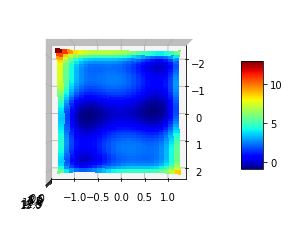

In [4]:
# View of the function from above to see how many global minima there are
ax.view_init(90, 0)
fig

In [5]:
# Find global minima
x0 = [0, 1]
glob_min1 = optimize.minimize(f,x0)

# See if there is a second global minima as the graph tells us
x0 = [0, -1]
glob_min2 = optimize.minimize(f,x0)

print("There are two global minima which are:", glob_min1.x, glob_min2.x)

print("When the initial guess is (0,0), we get one of the global minima,\n "
      "but not both of them. Each time the one we get varies because they are symmetric from the origin.")

There are two global minima which are: [-0.08984203  0.7126563 ] [ 0.08984202 -0.71265632]
When the initial guess is (0,0), we get one of the global minima,
 but not both of them. Each time the one we get varies because they are symmetric from the origin.


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In the following graph, we can see the result of fitting Alaska`s extreme temperatures to a gaussian function.


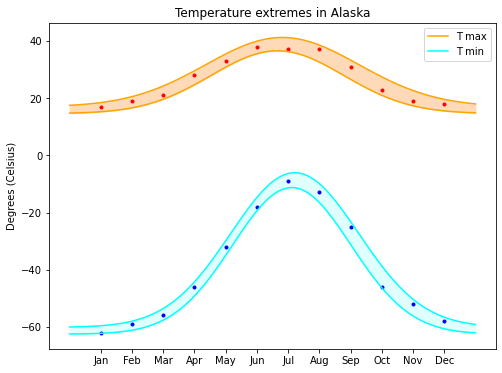

The parameters for both fittings are as follow:


,Height,h_err,Amplitude,a_err,Mean,m_err,Std,std_err,R^2
max T,15.78,1.18,23.09,1.15,5.74,0.08,2.29,0.17,0.985880
min T,-61.32,1.19,52.65,1.40,6.16,0.05,1.98,0.08,0.994604


The fit is reasonable in both cases.


In [6]:
#Define the arrays
max_T = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_T = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_n = np.arange(12)
months_continuo = np.linspace(-1,12,100)

# The gaussian function can describe both temperature extremes
def gauss(x, height, amp, mu, sigma):
    return height + amp*np.exp(-0.5*((x - mu)/sigma)**2)

# Fit

popt_max, pcov_max = optimize.curve_fit(gauss, months_n, max_T, p0 = (6, 0., np.min(max_T), 10))
popt_min, pcov_min = optimize.curve_fit(gauss, months_n, min_T, p0 = (6, 2.98, np.min(min_T), 40))

max_param_up = popt_max + np.sqrt(pcov_max.diagonal())
max_param_down = popt_max - np.sqrt(pcov_max.diagonal())
min_param_up = popt_min + np.sqrt(pcov_min.diagonal())
min_param_down = popt_min - np.sqrt(pcov_min.diagonal())

# Plot
fig = plt.figure(figsize=(8,6))
plt.title('Temperature extremes in Alaska')
plt.plot(months, min_T, '.b')
plt.plot(months, max_T, '.r')
plt.plot(months_continuo, gauss(months_continuo, *max_param_up), color = 'orange', label='T max')
plt.plot(months_continuo, gauss(months_continuo, *max_param_down), color = 'orange')
plt.fill_between(months_continuo, gauss(months_continuo, *max_param_up),gauss(months_continuo, *max_param_down), color = 'peachpuff')
plt.plot(months_continuo, gauss(months_continuo, *min_param_up), color = 'cyan', label='T min')
plt.plot(months_continuo, gauss(months_continuo, *min_param_down), color = 'cyan')
plt.fill_between(months_continuo, gauss(months_continuo, *min_param_up), gauss(months_continuo, *min_param_down), color = 'lightcyan')
plt.ylabel('Degrees (Celsius)')
plt.legend()

# Find the residuals and fit accuracy
residuals_maxT = max_T - gauss(months_n, *popt_max)
ss_res_max = np.sum(residuals_maxT**2)
ss_total_max = np.sum((max_T - np.mean(max_T))**2)
r_squared_max = 1 - (ss_res_max/ss_total_max)

residuals_minT = min_T - gauss(months_n, *popt_min)
ss_res_min = np.sum(residuals_minT**2)
ss_total_min = np.sum((min_T - np.mean(min_T))**2)
r_squared_min = 1 - (ss_res_min/ss_total_min)

values = {}
type(values)
categories = ['Height', 'h_err', 'Amplitude', 'a_err', 'Mean', 'm_err', 'Std', 'std_err',]

for i in range(int(len(categories)/2)):
    values[categories[2*i]] = [np.round(popt_max[i], 2), np.round(popt_min[i],2)]
    values[categories[2*i+1]] = [np.round(np.sqrt(pcov_max[i,i]),2), np.round(np.sqrt(pcov_min[i,i]),2)]
values['R^2'] = [r_squared_max, r_squared_min]

results = pd.DataFrame(values, index=['max T', 'min T'])

# Lets write the solution
print('In the following graph, we can see the result of fitting Alaska`s extreme temperatures to a gaussian function.')
plt.show()
print('The parameters for both fittings are as follow:')
display(results)
print('The fit is reasonable in both cases.')

 3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [7]:
residuals = np.load('C:/Users/cmart/Lab of Computational Physics/data/residuals_261.npy', allow_pickle=True)
data = pd.DataFrame(residuals.item())
data['residuals'].describe()

count    11131.000000
mean        -0.616477
std          4.163705
min       -160.850000
25%         -0.330000
50%         -0.110000
75%          0.060000
max         11.320000
Name: residuals, dtype: float64

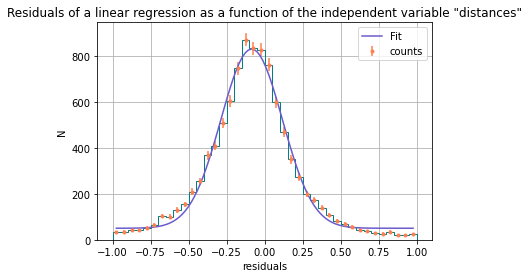

In [8]:
#As we see most of the residuals have values near 0, we update the data
data = data[abs(data['residuals']) < 1]
#data['residuals'].hist(bins = 30)

# Histogram with the data
counts, bins, patches = plt.hist(data['residuals'], bins=40, histtype= 'step', color = 'teal')
X = [(bins[i+1]+bins[i])/2 for i in range(len(bins)-1)]
unc = [i**(1/2) for i in counts]

# Fit the histogram  to a gaussian
def gauss(x, height, amp, mu, sigma):
    return height + amp*np.exp(-0.5*((x - mu)/sigma)**2)

popt, pcov = optimize.curve_fit(gauss, X, counts, p0 = (0., 0., 0, 10))

# Plot
X_cont = np.linspace(np.min(X), np.max(X), 100)
plt.errorbar(X, counts, yerr = unc, fmt = '.', label = 'counts', color = 'coral')
plt.plot(X_cont, gauss(X_cont, *popt), color = 'slateblue', label='Fit')
plt.grid(True)
plt.xlabel('residuals')
plt.ylabel('N')
plt.title('Residuals of a linear regression as a function of the independent variable "distances"')
plt.legend()
plt.show()

In [9]:
from scipy import stats

# Finally, we evaluate the goodness-of-fit
dof = len(X) - 1
print("number of degrees of freedom =", dof)
# calculate the chi^2
chi2 = np.sum((counts - gauss(X, *popt)/np.array(unc)**2))
print("\u03C7\u00b2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, dof)
print("p-value =", pvalue)

number of degrees of freedom = 39
χ² = 9857.330542362724
p-value = 0.0


The p-value being 0 means the fit is not good. Apparently, it seems like a good fit, but the data
shows us that statistically it is not correct. This can be due to understimation of the error, since the
$\chi^2$ is extremely big.

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

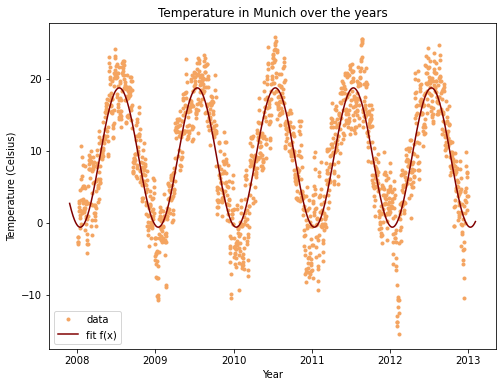

,parameter,value
0,a,-9.670000
1,b,12.340000
2,c,9.050000


In [10]:
# Load the data
data = np.loadtxt('C:/Users/cmart/Lab of Computational Physics/data/munich_temperatures_average_with_bad_data.txt')
# la primera columna es el año y segunda la temperatura por lo que interpreto

# Define the function for the fitting
from math import pi

def fit_func(t, a, b, c):
    """t is time in years"""
    return a*np.cos(2*pi*t + b) + c

# Select the data from 2008 to 2012
mask = (data[:,0] > 2008)
filtered_data = data[mask]
mask = (filtered_data[:,0] < 2013)
filtered_data = filtered_data[mask]

# We are going to filter the missrecorded temperatures (those that don't make sense in a physical way)
mask_temps = (filtered_data[:,1] < 40)
filtered_data = filtered_data[mask_temps]

# Fit
popt, pcov = optimize.curve_fit(fit_func, data[:,0], data[:,1])
years_continuo = np.linspace(2007.9, 2013.1, 2000)

# Plot
fig = plt.figure(figsize=(8,6))
plt.title('Temperature in Munich over the years')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.plot(filtered_data[:,0], filtered_data[:,1], '.', color = 'sandybrown', label = 'data')
plt.plot(years_continuo, fit_func(years_continuo, *popt), color = 'maroon', label = 'fit f(x)')
plt.legend()
plt.show()

# Table with best fit parameters
best_params = pd.DataFrame(data = {'parameter': ['a', 'b', 'c'], 'value': np.round(popt,2)})
best_params.style.set_table_attributes("style='display:inline'").set_caption("Best Parameters for $f(x) = a·cos(2\pi·t + b) + c$")

# Table with best fit parameters
best_params = pd.DataFrame(data = {'parameter': ['a', 'b', 'c'], 'value': np.round(popt,2)})
best_params.style.set_table_attributes("style='display:inline'").set_caption("Best Parameters for $f(x) = a·cos(2\pi·t + b) + c$")

In [11]:
# Daily average temperature in Munich
print("The average temperature in Munich is {} \N{DEGREE SIGN}C.".format(np.round(popt[2],2)))
# Max and minimum average temperatures of the year
print("The average temperature of coldest day of the year is {} \N{DEGREE SIGN}C.".format(np.round(popt[0]+popt[2],2)))
print("The average temperature of hottest day of the year is {} \N{DEGREE SIGN}C.".format(np.round(-popt[0]+popt[2],2)))

The average temperature in Munich is 9.05 °C.
The average temperature of coldest day of the year is -0.62 °C.
The average temperature of hottest day of the year is 18.72 °C.


The parameter _b_ represents a time shift, it helps the model to fit adequately
to the data. More precisely, it moves the date of the coldest temperatures of the year to
mid January.

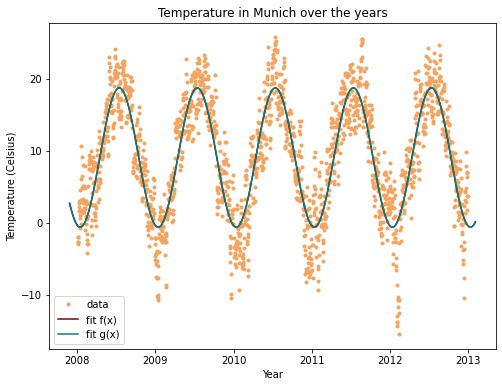

In [12]:
# Lets fit the data now to a different model
def fit_func2(t, a, b, c, d):
    """t is time in years"""
    return a*np.cos(2*pi*b*t + c) + d

# Fit
popt2, pcov2 = optimize.curve_fit(fit_func2, data[:,0], data[:,1])

# Plot
fig2 = plt.figure(figsize=(8,6))
plt.title('Temperature in Munich over the years')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.plot(filtered_data[:,0], filtered_data[:,1], '.', color = 'sandybrown', label = 'data')
plt.plot(years_continuo, fit_func(years_continuo, *popt), color = 'maroon', label = 'fit f(x)')
plt.plot(years_continuo, fit_func2(years_continuo, *popt2), color = 'teal', label = 'fit g(x)')
plt.legend()
plt.show()

In [13]:
# Lets find out whether the new parameter is necessary or not

# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

# SSR
ssr_f = np.sum((fit_func(filtered_data[:,0], *popt) - filtered_data[:,1])**2)
ssr_g = np.sum((fit_func2(filtered_data[:,0], *popt2) - filtered_data[:,1])**2)

# Degrees of freedom (number of parameters - 1)
dof_f = 2
dof_g = 3

# Results
print("SSR of f(x):", ssr_f)
print("SSR of g(x):", ssr_g)
print("Comparison between f(x) and g(x):")
ftest = Ftest(ssr_f,ssr_g,dof_f,dof_g, len(filtered_data[:,0]), verbose = True)


SSR of f(x): 24879.015368888555
SSR of g(x): 24851.938306737284
Comparison between f(x) and g(x):
CL: 0.159 , additional parameter necessary: NO
